# Predicting Life Expectancy

#### DS320 Project 2  --  Teddy, Yordanos, Kelsey

In [128]:
'''
Motivation: 
We aim to create a regression model that will predict Life Expectancy for different countries around the world. 
Our response variable will be Life Expectancy and our predictor variables are Country, Year, Status, Adult Mortality, 
Infant Deaths, Percentage Expenditure, Alcohol, Hepatitis B, Measles, Body Mass Index (BMI), Under Five Deaths, Polio, 
Total Expenditure, Diphtheria, HIV/AIDS, GDP, Population, Thinness 1-19, Thinness 5-9, Income Composition, Schooling. 
This is important as life expectancy is a key metric for assessing population health across age groups. Being able to 
predict how populations will age has enormous implications for the planning and provision of services and support. An 
increase in life expectancy of a country is a result of rising living standards, improved lifestyle and better education, 
as well as greater access to quality health services.

Data: https://www.kaggle.com/kumarajarshi/life-expectancy-who
This dataset includes characteristics to predict the life expectancy (in years) of a person. It includes data from 
the years 2000 to 2015 for 193 countries. It includes things like immunization factors, mortality factors, 
economic factors, social factors and other health related factors as well. It will be used to determine the 
predicting factors which are contributing most to life expectancy. The data comes from the Global Health 
Observatory (GHO) data repository under the World Health Organization (WHO).
-Preprocessed data from Kaggle

Number of Rows: 2,939

Number of Attributes: 22

Response Variable: Life Expectancy (years) 
 
Predictor Variables:
-Country
-Year
-Status (Developing or Developed)
-Adult Mortality Rate (probability of dying between 15 and 60 years per 1000 population)
-Infant Deaths (Number per 1000 population)
-Alcohol (per capita consumption in Liters)
-Percentage Expenditure (Percentage of GDP per capita)
-Hepatitis B (percentage among 1-year-olds)
-Measles (Number per 1000 population)
-Average BMI (body mass index)
-Number of Under 5 (years) Deaths
-Polio Coverage (among 1-year-olds (%))
-Total Expenditure (government expenditure on health)
-Diphtheria Coverage (among 1-year-olds (%))
-HIV/AIDS (Deaths per 1000 live births (0-4 years))
-GDP per capita
-Thinness 10-19 (Prevalence of thinness among children and adolescents for Age 10 to 19 (% ))
-Thinness 5-9 (Prevalence of thinness among children for Age 5 to 9 (%))
-Income Composition Index (0 to 1)
-Schooling (number of years)

'''

'\nMotivation: \nWe aim to create a regression model that will predict Life Expectancy for different countries around the world. \nOur response variable will be Life Expectancy and our predictor variables are Country, Year, Status, Adult Mortality, \nInfant Deaths, Percentage Expenditure, Alcohol, Hepatitis B, Measles, Body Mass Index (BMI), Under Five Deaths, Polio, \nTotal Expenditure, Diphtheria, HIV/AIDS, GDP, Population, Thinness 1-19, Thinness 5-9, Income Composition, Schooling. \nThis is important as life expectancy is a key metric for assessing population health across age groups. Being able to \npredict how populations will age has enormous implications for the planning and provision of services and support. An \nincrease in life expectancy of a country is a result of rising living standards, improved lifestyle and better education, \nas well as greater access to quality health services.\n\nData: https://www.kaggle.com/kumarajarshi/life-expectancy-who\nThis dataset includes ch

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns 
import scipy.stats as stat
import sklearn as sk
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bc86061ca3bf46d69be88949c3772fc9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='pxarWX-D-bd-K9ttpyrCQ2-HnZmURDkvBCu7_znc6zip',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_bc86061ca3bf46d69be88949c3772fc9.get_object(Bucket='ds320project-donotdelete-pr-ypjvkmjkrtau4h',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#Rename the columns
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV_AIDS"," thinness  1
body = client_bc86061ca3bf46d69be88949c3772fc9.get_object(Bucket='ds320project-donotdelete-pr-ypjvkmjkrtau4h',Key='Developed.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()
-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)
df.head()

### Data Cleaning/Exploratory Data Analysis

In [5]:
# Shape of data
df.shape

# 2,938 rows, 22 attributes

(2938, 22)

In [6]:
# Display column names
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [7]:
# Data types
df.dtypes

#all numeric except for country and status

Country                      object
Year                          int64
Status                       object
Life_Expectancy             float64
Adult_Mortality             float64
Infant_Deaths                 int64
Alcohol                     float64
Percentage_Exp              float64
HepatitisB                  float64
Measles                       int64
BMI                         float64
Under_Five_Deaths             int64
Polio                       float64
Tot_Exp                     float64
Diphtheria                  float64
HIV_AIDS                    float64
GDP                         float64
Population                  float64
thinness_1to19_years        float64
thinness_5to9_years         float64
Income_Comp_Of_Resources    float64
Schooling                   float64
dtype: object

In [8]:
# Info/data type descriptions
df.info()

# Country and Status are categorical variables, the rest are quantitative

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   2938 non-null   object 
 1   Year                      2938 non-null   int64  
 2   Status                    2938 non-null   object 
 3   Life_Expectancy           2928 non-null   float64
 4   Adult_Mortality           2928 non-null   float64
 5   Infant_Deaths             2938 non-null   int64  
 6   Alcohol                   2744 non-null   float64
 7   Percentage_Exp            2938 non-null   float64
 8   HepatitisB                2385 non-null   float64
 9   Measles                   2938 non-null   int64  
 10  BMI                       2904 non-null   float64
 11  Under_Five_Deaths         2938 non-null   int64  
 12  Polio                     2919 non-null   float64
 13  Tot_Exp                   2712 non-null   float64
 14  Diphther

In [9]:
# Basic statistics
df.describe(include='all')

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV_AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Turkey,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


In [10]:
'''
Analysis:
There are 2938 total instances. Some variables have missing data.
The top country (occurs most often) is Sierra Leone.
A status of Developing occurs more often than Developed country.
The mean is a lot higher than the median for many of the numerical variables, which suggests there might be some high outliers.
Some of the max values are extremely high relative to the other data.
'''

'\nAnalysis:\nThere are 2938 total instances. Some variables have missing data.\nThe top country (occurs most often) is Sierra Leone.\nA status of Developing occurs more often than Developed country.\nThe mean is a lot higher than the median for many of the numerical variables, which suggests there might be some high outliers.\nSome of the max values are extremely high relative to the other data.\n'

In [11]:
# Check for missing values

In [12]:
df.isnull().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy              10
Adult_Mortality              10
Infant_Deaths                 0
Alcohol                     194
Percentage_Exp                0
HepatitisB                  553
Measles                       0
BMI                          34
Under_Five_Deaths             0
Polio                        19
Tot_Exp                     226
Diphtheria                   19
HIV_AIDS                      0
GDP                         448
Population                  652
thinness_1to19_years         34
thinness_5to9_years          34
Income_Comp_Of_Resources    167
Schooling                   163
dtype: int64

In [13]:
'''
There are some missing data as seen above. For the attributes that have a lot of missing data, we might want to 
consider replacing these with the mean or median instead of deleting the rows so we do not lose a ton of data.
'''

'\nThere are some missing data as seen above. For the attributes that have a lot of missing data, we might want to \nconsider replacing these with the mean or median instead of deleting the rows so we do not lose a ton of data.\n'

In [14]:
# Get rid of missing values or replace with the mean before appling Z-score to get rid of outliers.

In [15]:
# Replace missing values with the mean for columns above with missing data  --- mean or median

##replace missing values for price with the mean
mean_life=df["Life_Expectancy"].mean()
mean_mort=df["Adult_Mortality"].mean()
mean_alc=df["Alcohol"].mean()
mean_hep=df["HepatitisB"].mean()
mean_bmi=df["BMI"].mean()
mean_pol=df["Polio"].mean()
mean_tot=df["Tot_Exp"].mean()
mean_diph=df["Diphtheria"].mean()
mean_gdp=df["GDP"].mean()
mean_popu=df["Population"].mean()
mean_1to19=df["thinness_1to19_years"].mean()
mean_5to9=df["thinness_5to9_years"].mean()
mean_res=df["Income_Comp_Of_Resources"].mean()
mean_scho=df["Schooling"].mean()

df["Life_Expectancy"].fillna(mean_life, inplace=True) #fill cells with no value with the mean
df["Adult_Mortality"].fillna(mean_mort, inplace=True)
df["Alcohol"].fillna(mean_alc, inplace=True)
df["HepatitisB"].fillna(mean_hep, inplace=True)
df["BMI"].fillna(mean_bmi, inplace=True)
df["Polio"].fillna(mean_pol, inplace=True)
df["Tot_Exp"].fillna(mean_tot, inplace=True)
df["Diphtheria"].fillna(mean_diph, inplace=True)
df["GDP"].fillna(mean_gdp, inplace=True)
df["Population"].fillna(mean_popu, inplace=True)
df["thinness_1to19_years"].fillna(mean_1to19, inplace=True)
df["thinness_5to9_years"].fillna(mean_5to9, inplace=True)
df["Income_Comp_Of_Resources"].fillna(mean_res, inplace=True)
df["Schooling"].fillna(mean_scho, inplace=True)


In [16]:
#we check again for missing values to confirm that we filled them with mean values
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV_AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

In [17]:
# Check for duplicate values
#Drop duplicate rows
df.drop_duplicates()
print(df.shape)   # Check shape of data frame

#No duplicate rows

(2938, 22)


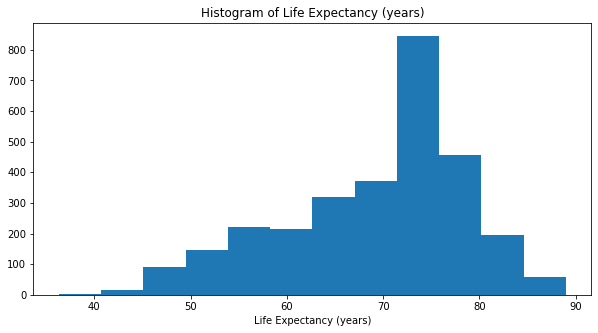

In [18]:
# Histogram for response variable, life expectancy
df.Life_Expectancy.hist(figsize=(10,5), bins=12, grid=False)
plt.title("Histogram of Life Expectancy (years)")
plt.xlabel('Life Expectancy (years)') # add x-label
plt.show()

#The histogram shows the data is slightly skewed left. Normalizing the data will help deal with this issue.
# It peaks at about 75 years.

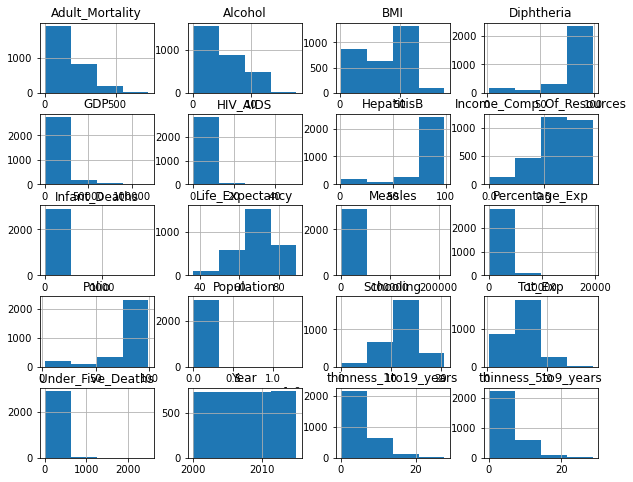

In [19]:
# Histograms for all numerical attributes
df.hist(figsize=(10,8), bins=4)
plt.show()

#Some of the attributes seem to be skewed. Normalizing the data will help deal with this issue.

In [20]:
# Boxplots - Look for Outliers

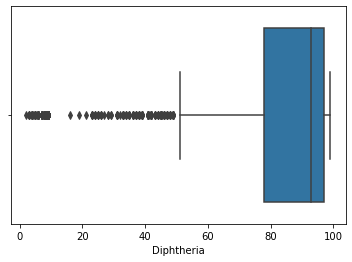

In [21]:
#Boxplot for Diphtheria
sns.boxplot(x=df['Diphtheria'])

#There are many low outliers

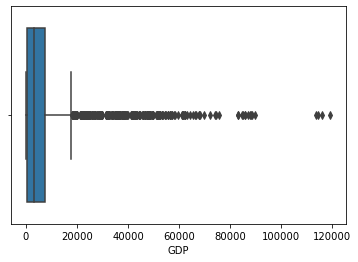

In [22]:
#Boxplot for GDP
sns.boxplot(x=df['GDP'])

#There are many outliers on the upper end of GDP

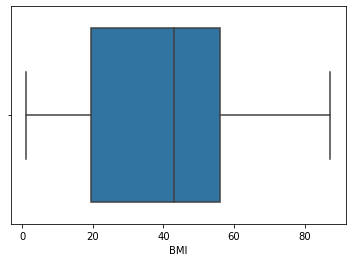

In [23]:
#Boxplot for BMI
sns.boxplot(x=df['BMI'])

#No outliers

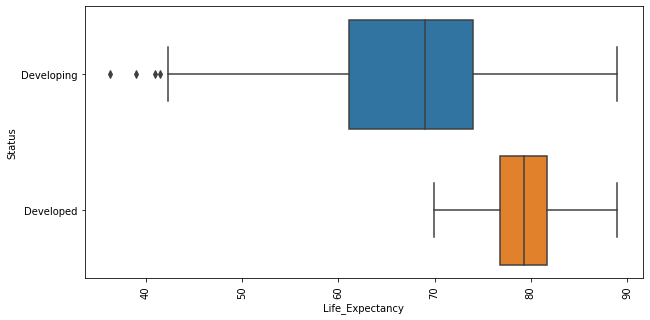

In [24]:
#Boxplot using X=Life Expectancy and Y=Status
plt.figure(figsize=(10,5))
sb.boxplot(x="Life_Expectancy",y="Status",data=df)
plt.xticks(rotation=90)

plt.show()
#some low outliers for developing countries

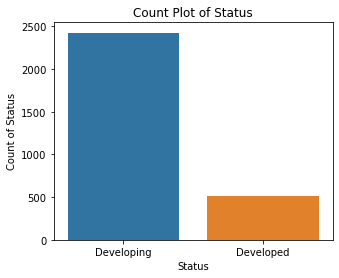

In [25]:
# Count plot to show number of instances for each category in status
plt.figure(figsize=(5,4)) #Set plot size

sb.countplot(x='Status', data=df)

plt.title('Count Plot of Status') # add a title to the plot
plt.ylabel('Count of Status') # add y-label
plt.xlabel('Status') # add x-label

plt.show()

#There are a lot more developing countries in the data than developed countries

In [26]:
# Show number of rows for each Status
df.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

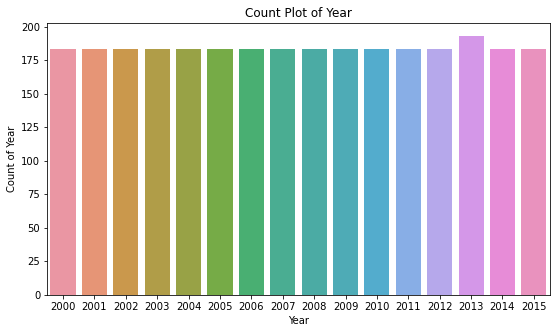

In [27]:
# Count plot to show number of instances for each year
plt.figure(figsize=(9,5)) #Set plot size

sb.countplot(x='Year', data=df)

plt.title('Count Plot of Year') # add a title to the plot
plt.ylabel('Count of Year') # add y-label
plt.xlabel('Year') # add x-label

plt.show()

#The data ranges from 2000 to 2015 (16 years)
#The number of instances for each year is about the same, except there seems to be a few more for 2013

In [28]:
# Show number of rows for each country
df.Country.value_counts()

# Come back to this later on 

Turkey                   16
Lithuania                16
Senegal                  16
Lebanon                  16
Morocco                  16
                         ..
Marshall Islands          1
Dominica                  1
Monaco                    1
Niue                      1
Saint Kitts and Nevis     1
Name: Country, Length: 193, dtype: int64

In [29]:
# Ideally, each country should have 16 rows since there are 16 years (2000-2015). There are some countries with only 1 row.
# We might consider removing these countries.

In [30]:
# Check data head
df.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Tot_Exp,Diphtheria,HIV_AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [31]:
# 1- hot categorical variables (Country, Year, Status)
#Categorical to numbers for Country (1-hot)
Country_dummy = pd.get_dummies(df["Country"], prefix='Country', drop_first=True, columns=['Country'])    #create k-1 dummy variables for k categories
Country_dummy.head()

,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Merge data from df and Country_dummy
dfc = pd.concat([df, Country_dummy], axis=1)
#drop original column "Country" from "dfc"
dfc.drop("Country", axis = 1, inplace=True)
dfc.head()

,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,...,Country_United Republic of Tanzania,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,0,0,0,0,0,0,0,0,0,0
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,0,0,0,0,0,0,0,0,0,0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,0,0,0,0,0,0,0,0,0,0
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,0,0,0,0,0,0,0,0,0,0
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Categorical to numbers for Year (1-hot)
Year_dummy = pd.get_dummies(dfc["Year"], prefix='Year', drop_first=True, columns=['Year'])    #create k-1 dummy variables for k categories
Year_dummy.head()

,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [34]:
#Merge data from dfc and Year_dummy
dfcy = pd.concat([dfc, Year_dummy], axis=1)
#drop original column "Year" from "dfcy"
dfcy.drop("Year", axis = 1, inplace=True)
dfcy.head()

,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,...,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,0,0,0,0,0,0,0,0,0,1
1,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,0,0,0,0,0,0,0,0,1,0
2,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,0,0,0,0,0,0,0,1,0,0
3,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,0,0,0,0,0,0,1,0,0,0
4,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,0,0,0,0,0,1,0,0,0,0


In [35]:
#Categorical to numbers for Status (1-hot)
Status_dummy = pd.get_dummies(dfcy["Status"], prefix='Status', drop_first=True, columns=['Status'])    #create k-1 dummy variables for k categories
Status_dummy.head()

# 1 = Developing, 0 = Developed

,Status_Developing
0,1
1,1
2,1
3,1
4,1


In [36]:
#Merge data from dfc and Status_dummy
dfcys = pd.concat([dfcy, Status_dummy], axis=1)
#drop original column "Status" from "dfcys"
dfcys.drop("Status", axis = 1, inplace=True)
dfcys.head()

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,1,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,1,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,1,0,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,1,0,0,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
# Check data types
dfcys.dtypes

Life_Expectancy      float64
Adult_Mortality      float64
Infant_Deaths          int64
Alcohol              float64
Percentage_Exp       float64
                      ...   
Year_2012              uint8
Year_2013              uint8
Year_2014              uint8
Year_2015              uint8
Status_Developing      uint8
Length: 227, dtype: object

In [38]:
# Subset data into all numeric attributes
df_subset = dfcys[["Adult_Mortality","BMI","Infant_Deaths", "Alcohol","Under_Five_Deaths","Percentage_Exp",
    "Polio","HepatitisB","Measles", "BMI", "Under_Five_Deaths","Polio","Tot_Exp","Diphtheria","HIV_AIDS", "GDP",
    "Population","thinness_1to19_years", "thinness_5to9_years","Income_Comp_Of_Resources","Schooling"]].head()

df_subset.head()

,Adult_Mortality,BMI,Infant_Deaths,Alcohol,Under_Five_Deaths,Percentage_Exp,Polio,HepatitisB,Measles,BMI,...,Polio,Tot_Exp,Diphtheria,HIV_AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,263.0,19.1,62,0.01,83,71.279624,6.0,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,18.6,64,0.01,86,73.523582,58.0,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,18.1,66,0.01,89,73.219243,62.0,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,17.6,69,0.01,93,78.184215,67.0,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,17.2,71,0.01,97,7.097109,68.0,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [39]:
#We will use Z-score function defined in scipy library to detect the outliers.

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dfcys))
print(z)

[[0.44444792 0.79158632 0.26882378 ... 0.25772986 3.88003155 0.45939851]
 [0.98094995 0.85607167 0.28578638 ... 3.88003155 0.25772986 0.45939851]
 [0.98094995 0.83188966 0.30274898 ... 0.25772986 0.25772986 0.45939851]
 ...
 [2.56941673 0.73994077 0.04498439 ... 0.25772986 0.25772986 0.45939851]
 [2.5168185  4.20124926 0.04498439 ... 0.25772986 0.25772986 0.45939851]
 [2.44318096 4.03197521 0.05346569 ... 0.25772986 0.25772986 0.45939851]]


In [40]:
"""
This is to define a threshold to identify an outlier.
"""
threshold = 4
print(np.where(z > 4))

(array([  16,   17,   18, ..., 2937, 2937, 2937]), array([ 19,  19,  19, ...,   1,  12, 210]))


In [41]:
"""
Don’t be confused by the results. The first array contains the list of row numbers and second 
array respective column numbers, which mean z[][] have a Z-score higher than 3.
"""

print(z[16][19])

13.513881751739582


In [42]:
"""
Remove outliers using threshold of 4
"""
dfcys_o = dfcys[(z < 4).all(axis=1)]

In [43]:
# Shape of original dataset
dfcys.shape

(2938, 227)

In [44]:
# Shape of dataset after removing outliers
dfcys_o.shape

# This is not good because the Z-score removed more than 2,000 rows. We are only left with 16 rows. We might consider using a different 
# threshold for the z-score or not removing the outliers because of this.

(16, 227)

In [45]:
dfcys_o

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,1,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,1,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,1,0,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,1,0,0,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,1,0,0,0,0,1
5,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,...,0,0,0,1,0,0,0,0,0,1
6,58.6,281.0,77,0.01,56.762217,63.0,2861,16.2,106,63.0,...,0,0,1,0,0,0,0,0,0,1
7,58.1,287.0,80,0.03,25.873925,64.0,1599,15.7,110,64.0,...,0,1,0,0,0,0,0,0,0,1
8,57.5,295.0,82,0.02,10.910156,63.0,1141,15.2,113,63.0,...,1,0,0,0,0,0,0,0,0,1
9,57.3,295.0,84,0.03,17.171518,64.0,1990,14.7,116,58.0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
outliers=dfcys[(z >=3)]

In [47]:
outliers=outliers.reset_index().drop_duplicates(subset='index',keep='first').set_index('index')

In [48]:
#Display the rows removed by the Z-score method
outliers

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
index,,,,,,,,,,,,,,,,,,,,,
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,1,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,1,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,1,0,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,1,0,0,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,0,0,0,0,0,0,0,0,0,1
2934,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,0,0,0,0,0,0,0,0,0,1
2935,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,0,0,0,0,0,0,0,0,0,1


In [49]:
outliers.mean()

Life_Expectancy       69.229843
Adult_Mortality      164.743263
Infant_Deaths         30.284304
Alcohol                4.604425
Percentage_Exp       738.499108
                        ...    
Year_2012              0.062308
Year_2013              0.065713
Year_2014              0.062308
Year_2015              0.062308
Status_Developing      0.825672
Length: 227, dtype: float64

In [50]:
# We will move on without removing the outliers becuase the Z-score removed too much of the data

In [51]:
dfcys.mean()

Life_Expectancy       69.224932
Adult_Mortality      164.796448
Infant_Deaths         30.303948
Alcohol                4.602861
Percentage_Exp       738.251295
                        ...    
Year_2012              0.062287
Year_2013              0.065691
Year_2014              0.062287
Year_2015              0.062287
Status_Developing      0.825732
Length: 227, dtype: float64

In [52]:
# group by country  
df_Country = df.groupby('Country', axis=0).mean()


print(type(df.groupby('Country', axis=0)))

df_Country

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV_AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,2007.5,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,2007.5,73.61875,108.1875,20.3125,0.668929,236.185241,78.735115,1943.8750,48.74375,23.5000,91.7500,4.687387,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,2007.5,49.01875,328.5625,83.7500,5.669554,102.100268,74.911452,3561.3125,18.01875,132.6250,46.1250,4.045512,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,2007.5,75.05625,127.5000,0.0000,7.740179,1001.585226,97.183779,0.0000,38.42500,0.0000,96.9375,4.863012,98.3125,0.12500,9759.305728,1.275338e+07,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2007.5,73.38750,163.0000,9.3750,7.243929,0.000000,66.250000,165.0000,54.48750,10.7500,74.6875,5.057387,68.5000,0.10000,7483.158469,1.275338e+07,1.65000,1.56250,0.726812,12.78750
Viet Nam,2007.5,74.77500,126.5625,29.1875,3.182054,0.000000,86.301336,4232.9375,11.18750,36.5000,94.9375,5.974887,91.7500,0.14375,7483.158469,1.275338e+07,14.92500,15.62500,0.627063,11.51250
Yemen,2007.5,63.86250,211.8125,39.3750,0.332054,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,5.063637,72.6250,0.10000,7483.158469,1.275338e+07,13.83125,13.75000,0.475500,8.50625


In [53]:
#Visulaizations 

In [54]:
# group by status  
df_Status = df.groupby('Status', axis=0).sum()


print(type(df.groupby('Status', axis=0)))

df_Status

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV_AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Status,,,,,,,,,,,,,,,,,,,,
Developed,1027840,40549.300000,40799.000000,765,4885.020102,1.384243e+06,43848.699790,255491,26523.600000,927,47993.00000,3815.962065,47860.000000,51.2,1.035884e+07,4.065626e+09,676.200000,663.900000,425.677451,7927.954054
Developing,4870250,162833.549317,443372.964481,88268,8638.184891,7.847389e+05,193954.375262,6853271,86064.222383,122574,194539.45358,13630.438768,194008.157588,5067.1,1.162668e+07,3.340379e+10,13542.849931,13645.090771,1418.067577,27306.871171


In [55]:
'''
We can see that most of the variables give worse numbers for Developing countries than for Developed countries. For example, the
total number of infant deaths for developing countries is 88,268, but for developed countries, it is only 765.Interestling enough,
Developing country appear to have the highest Total expenditure compared to Developed country despite the fact that we would expect 
Developed countries to have the highest life expectancy.Developing countries also consume almost twice the amount alcohol than developed countries  
'''

'\nWe can see that most of the variables give worse numbers for Developing countries than for Developed countries. For example, the\ntotal number of infant deaths for developing countries is 88,268, but for developed countries, it is only 765.\n'

In [56]:
# group by Year
df_Year = df.groupby('Year', axis=0).mean()


print(type(df.groupby('Year', axis=0)))

df_Year

# We can look at the trends of the variables over the years

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV_AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Year,,,,,,,,,,,,,,,,,,,
2000,66.750273,181.475410,37.540984,4.570890,473.850781,77.733143,4663.792350,34.467445,53.726776,76.380604,5.593184,73.770340,2.530055,5148.212760,1.016458e+07,5.144150,5.240659,0.518516,10.593595
2001,67.128962,175.169399,36.825137,4.555917,516.625910,77.315632,4640.262295,36.159795,52.038251,78.025413,5.607010,76.753947,2.573770,5256.722520,1.065698e+07,4.956172,5.053228,0.566538,11.007256
2002,67.351366,171.437158,35.584699,4.660617,476.794487,78.212198,3204.754098,37.123729,50.300546,79.710931,5.693458,78.921575,2.573770,5040.548682,7.964792e+06,5.162729,5.115523,0.571260,11.187038
2003,67.433333,169.131148,34.874317,4.690016,494.706547,76.043191,3708.792350,36.460888,48.584699,80.377598,5.829260,78.905181,2.546995,5189.223864,1.072676e+07,4.923385,5.022080,0.575413,11.345508
2004,67.646448,186.262295,33.644809,4.752857,772.336156,78.712135,2805.497268,36.591489,47.092896,80.191805,5.860407,79.850536,2.478689,7118.929362,1.595690e+07,4.935407,5.027544,0.586538,11.571737
2005,68.209290,167.633880,32.366120,4.843747,823.318110,80.917249,3200.551913,35.637391,45.306011,80.989620,5.921009,81.681138,2.345902,7284.219331,1.707344e+07,5.096609,5.192025,0.598145,11.693049
2006,68.667760,170.404372,31.808743,4.915972,828.776319,81.727294,2063.224044,37.542855,44.273224,84.516668,5.702921,82.236744,2.169399,7367.117208,1.479465e+07,5.112456,5.154320,0.632052,11.922011
2007,69.036066,159.808743,30.612022,5.011819,954.458468,81.500388,1557.540984,36.992582,42.732240,84.789892,5.636091,84.307782,1.992896,8381.722429,1.727149e+07,5.032674,4.975085,0.638374,12.035672
2008,69.427869,174.519126,29.568306,5.004879,1095.802669,83.348684,1523.229508,38.226462,41.322404,85.549455,5.726582,84.843301,1.797268,10143.582379,1.020154e+07,4.906445,4.940659,0.644724,12.166273


In [57]:
lifeyear = df_Year['Life_Expectancy']
lifeyear

Year
2000    66.750273
2001    67.128962
2002    67.351366
2003    67.433333
2004    67.646448
2005    68.209290
2006    68.667760
2007    69.036066
2008    69.427869
2009    69.938251
2010    70.048634
2011    70.654098
2012    70.916940
2013    71.131862
2014    71.536612
2015    71.616940
Name: Life_Expectancy, dtype: float64

Text(0.5, 1.0, 'Average Life Expectancy by Year')

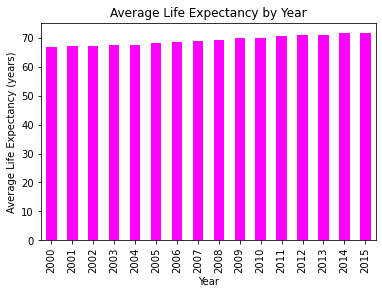

In [58]:
# Make a bar chart with this table showing average life expectancy for each year

lifeyear.plot(kind='bar', color='fuchsia')

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Average Life Expectancy (years)') # add y-label to the plot
plt.title('Average Life Expectancy by Year') # add title to the plot

#Average life expectancy increases slightly each year

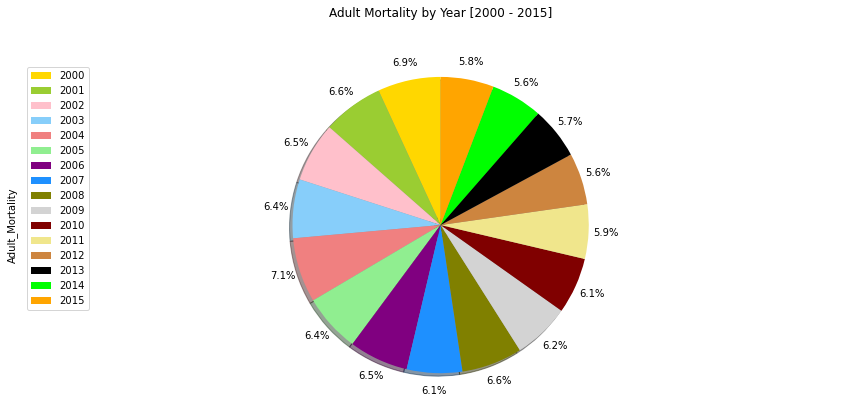

In [60]:
# Pie chart for adult mortality by year
colors_list = ['gold', 'yellowgreen', 'pink', 'lightskyblue','lightcoral', 'lightgreen', 'purple', 'dodgerblue', 'olive','lightgray', 'maroon', 'khaki', 'peru', 'black', 'lime', 'orange']

df_Year['Adult_Mortality'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            
                            )

# scale the title up by 12% to match pctdistance
plt.title('Adult Mortality by Year [2000 - 2015]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_Year.index, loc='upper left') 

plt.show()

In [61]:
#Scatter plots

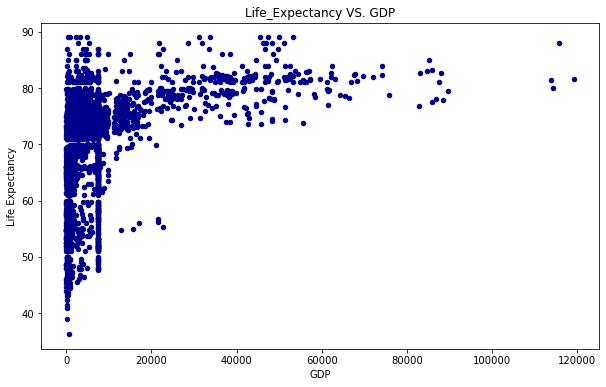

In [62]:
# Scatter plot of life Expectancy vs GDP
df.plot(kind='scatter', x='GDP', y='Life_Expectancy' , figsize=(10, 6), color='darkblue')

plt.title('Life_Expectancy VS. GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')  
plt.show()

#Life expectancy tends to increase as GDP increases

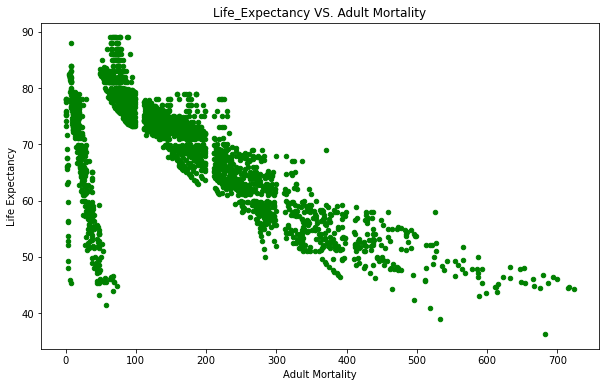

In [63]:
# Scatter plot of life Expectancy vs Adult Mortality
df.plot(kind='scatter', x='Adult_Mortality', y='Life_Expectancy', figsize=(10, 6), color='green')

plt.title('Life_Expectancy VS. Adult Mortality')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')  
plt.show()

#Life expectancy tends to decrease as Adult Mortality increases
#It is also interesting to not that it looks like there are sort of 2 clusters going on here (maybe one for 
# developed and one for developing countries)

Text(0.5, 1.0, 'Regression Plot of Life Expectancy VS. Schooling')

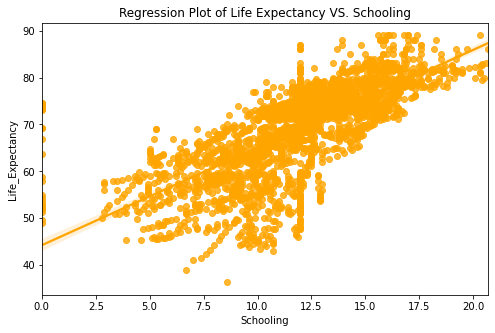

In [64]:
# Regression Plot
plt.figure(figsize=(8,5))
sb.regplot(x='Schooling', y='Life_Expectancy', data=df, color='orange')

plt.title('Regression Plot of Life Expectancy VS. Schooling')

# The regression plot shows a positive, linear relationship between Life Expectancy and years of school

In [65]:
# Correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV_AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
Year,1.00,0.17,-0.08,-0.04,-0.05,0.03,0.09,-0.08,0.11,-0.04,0.09,0.08,0.13,-0.14,0.09,0.01,-0.05,-0.05,0.24,0.20
Life_Expectancy,0.17,1.00,-0.70,-0.20,0.39,0.38,0.20,-0.16,0.56,-0.22,0.46,0.21,0.48,-0.56,0.43,-0.02,-0.47,-0.47,0.69,0.72
Adult_Mortality,-0.08,-0.70,1.00,0.08,-0.19,-0.24,-0.14,0.03,-0.38,0.09,-0.27,-0.11,-0.27,0.52,-0.28,-0.01,0.30,0.31,-0.44,-0.44
Infant_Deaths,-0.04,-0.20,0.08,1.00,-0.11,-0.09,-0.18,0.50,-0.23,1.00,-0.17,-0.13,-0.18,0.03,-0.11,0.55,0.47,0.47,-0.14,-0.19
Alcohol,-0.05,0.39,-0.19,-0.11,1.00,0.34,0.08,-0.05,0.32,-0.11,0.21,0.29,0.22,-0.05,0.32,-0.03,-0.42,-0.41,0.42,0.50
Percentage_Exp,0.03,0.38,-0.24,-0.09,0.34,1.00,0.01,-0.06,0.23,-0.09,0.15,0.17,0.14,-0.10,0.89,-0.02,-0.25,-0.25,0.38,0.39
HepatitisB,0.09,0.20,-0.14,-0.18,0.08,0.01,1.00,-0.09,0.13,-0.18,0.41,0.05,0.50,-0.10,0.06,-0.11,-0.11,-0.11,0.15,0.17
Measles,-0.08,-0.16,0.03,0.50,-0.05,-0.06,-0.09,1.00,-0.18,0.51,-0.14,-0.10,-0.14,0.03,-0.07,0.24,0.22,0.22,-0.12,-0.12
BMI,0.11,0.56,-0.38,-0.23,0.32,0.23,0.13,-0.18,1.00,-0.24,0.28,0.23,0.28,-0.24,0.28,-0.06,-0.53,-0.54,0.48,0.51
Under_Five_Deaths,-0.04,-0.22,0.09,1.00,-0.11,-0.09,-0.18,0.51,-0.24,1.00,-0.19,-0.13,-0.20,0.04,-0.11,0.54,0.47,0.47,-0.16,-0.21


In [66]:
'''
Variables very correlated with the Response variable, Life Expectancy:
-Schooling (0.75)
-Adult Mortality (-0.70)
-Income_Comp_Of_Resources (0.72)
-BMI (0.57)
-HIV_AIDS (-0.56)
-thinness_1to19_years (-0.48)
-Diphtheria (0.48)
-thinness_5to9_years (-0.47)
-Polio (0.47)
-GDP (0.46)
--> Least correlated are Year and Population

Predictor variables highly correlated with eachother:
-Infant Deaths and Under 5 Deaths (1.00)
-Thinness 1-19 years and thinness 5-9 years (0.94)
-GDP and Percentage_Exp (0.90)
-Schooling and Income_Comp_Of_Resources (0.80)
-Polio and Diphtheria (0.67)
-Hepatitis B and Diphtheria (0.61)

-> For regression model, remove one variable if highly correlated with another predictor (multi-collinearity)
'''

'\nVariables very correlated with the Response variable, Life Expectancy:\n-Schooling (0.75)\n-Adult Mortality (-0.70)\n-Income_Comp_Of_Resources (0.72)\n-BMI (0.57)\n-HIV_AIDS (-0.56)\n-thinness_1to19_years (-0.48)\n-Diphtheria (0.48)\n-thinness_5to9_years (-0.47)\n-Polio (0.47)\n-GDP (0.46)\n--> Least correlated are Year and Population\n\nPredictor variables highly correlated with eachother:\n-Infant Deaths and Under 5 Deaths (1.00)\n-Thinness 1-19 years and thinness 5-9 years (0.94)\n-GDP and Percentage_Exp (0.90)\n-Schooling and Income_Comp_Of_Resources (0.80)\n-Polio and Diphtheria (0.67)\n-Hepatitis B and Diphtheria (0.61)\n\n-> For regression model, remove one variable if highly correlated with another predictor (multi-collinearity)\n'

In [67]:
# Pearson correlation coefficient for Life Expectancy and Schooling
pearson_coef, p_value = stat.pearsonr(df['Life_Expectancy'], df['Schooling'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.7150663398620057  with a P-value of P = 0.0


In [68]:
# Pearson correlation coefficient for Life Expectancy and Adult Mortality
pearson_coef, p_value = stat.pearsonr(df['Life_Expectancy'], df['Adult_Mortality'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.6963593137699758  with a P-value of P = 0.0


In [69]:
# Pearson correlation coefficient for Life Expectancy and Income Composition of Resources
pearson_coef, p_value = stat.pearsonr(df['Life_Expectancy'], df['Income_Comp_Of_Resources'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6924828049608566  with a P-value of P = 0.0


In [70]:
'''
The p-value for the pearson correlation coefficients for the variables above are all 0, so these correlations are
statistically significant.
'''

'\nThe p-value for the pearson correlation coefficients for the variables above are all 0, so these correlations are\nstatistically significant.\n'

## Regression Model

In [71]:
"""
Regression Model with Life expectancy vs adult mortality, income composition of resources, and years of schooling
Lets prepare and train our model on the basis of multiple variables and
Lets split that dataset into training and test set for multiple columns/attributes
"""

X = pd.DataFrame(np.c_[dfcys['Adult_Mortality'], dfcys['Income_Comp_Of_Resources'], dfcys['Schooling']], columns = ['Adult_Mortality','Income_Comp_Of_Resources','Schooling'])
Y = df['Life_Expectancy']



In [72]:
dfcys.head()

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,1,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,1,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,1,0,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,1,0,0,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,1,0,0,0,0,1


In [73]:
#Normalize the data
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.79158632, -0.72540055, -0.57993072],
       [ 0.85607167, -0.74005007, -0.61056961],
       [ 0.83188966, -0.7693491 , -0.6412085 ],
       [ 0.86413234, -0.80353132, -0.6718474 ],
       [ 0.88831434, -0.84747987, -0.76376407]])

In [74]:
#Sampling

"""
Lets prepare samples for Training and Test dataset (80% training, 20% test)
"""
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2350, 3)
(588, 3)
(2350,)
(588,)


In [75]:
#Model building

"""
Lets prepare our model for training
"""
from sklearn.linear_model import LinearRegression #For linear regression implementation
from sklearn.metrics import mean_squared_error #Its for model evaluation
from sklearn.metrics import r2_score #Its for model evaluation

In [76]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [77]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# The coefficients
print ('Coefficients: ', lin_model.coef_)
print ('Intercept: ', lin_model.intercept_)


The model performance for training set
--------------------------------------
RMSE is 5.141809207027083
R2 score is 0.7082954083116367


Coefficients:  [-4.2045375   2.18142666  3.25219313]
Intercept:  69.20650656414492


In [78]:
'''
The R-squared is 0.708. Adult mortality rate, income composition of resources, and years of schooling explain about 
71% of the variation in life expectancy.

The RMSE is 5.142.

The coefficients on the predictor variables are also shown above.
For each increase in adult mortality rate, life expectancy decreases by about 4.2 years.
For each increase in income composition of resources, life expectancy increases by about 2.2 years.
For each increase in number of years of schooling, life expectancy increases by about 3.3 years.

'''

'\nThe R-squared is 0.708. Adult mortality rate, income composition of resources, and years of schooling explain about \n71% of the variation in life expectancy.\n\nThe RMSE is 5.142.\n\nThe coefficients on the predictor variables are also shown above.\nFor each increase in adult mortality rate, life expectancy decreases by about 4.2 years.\nFor each increase in income composition of resources, life expectancy increases by about 2.2 years.\nFor each increase in number of years of schooling, life expectancy increases by about 3.3 years.\n\n'

In [79]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for testing set
--------------------------------------
RMSE is 4.949476706832434
R2 score is 0.7256170068669695


In [80]:
'''
The R-squared for the test set is about 0.726, which is slightly higher than the R-squared for the training set.
'''

'\nThe R-squared for the test set is about 0.726, which is slightly higher than the R-squared for the training set.\n'

In [81]:
"""
Add Status (developing, developed)
Regression Model with Life expectancy vs adult mortality, income composition of resources, and years of schooling, and Status
Lets prepare and train our model on the basis of multiple variables and
Lets split that dataset into training and test set for multiple columns/attributes
"""

X = pd.DataFrame(np.c_[dfcys['Adult_Mortality'], dfcys['Income_Comp_Of_Resources'], dfcys['Schooling'], dfcys['Status_Developing']], 
                 columns = ['Adult_Mortality','Income_Comp_Of_Resources','Schooling', 'Status_Developing'])
Y = dfcys['Life_Expectancy']


In [82]:
#Normalize the data
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

#Sampling

"""
Lets prepare samples for Training and Test dataset (80% training, 20% test)
"""

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

#Model Building
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# The coefficients
print ('Coefficients: ', lin_model.coef_)
print ('Intercept: ', lin_model.intercept_)

The model performance for training set
--------------------------------------
RMSE is 5.084018983039773
R2 score is 0.714815657887178


Coefficients:  [-4.10713101  2.04033062  2.96670272 -0.90377   ]
Intercept:  69.21681905017117


In [83]:
'''
The R-squared for this model is slightly higher after adding the variable, Status. It is 0.715.
The RMSE is 5.084, which is less than the previous model, indicating a slightly better fit when Status is included.

Interpret the coefficient on Status:
If the country is a developing country, life expectancy is about -0.9 years less than if it is a developed country.
'''

'\nThe R-squared for this model is slightly higher after adding the variable, Status. It is 0.715.\nThe RMSE is 5.084, which is less than the previous model, indicating a slightly better fit when Status is included.\n\nInterpret the coefficient on Status:\nIf the country is a developing country, life expectancy is about -0.9 years less than if it is a developed country.\n'

In [84]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.881269656910159
R2 score is 0.7331272565756661


In [85]:
'''
The R-squared for the testing set is 0.733.
'''

'\nThe R-squared for the testing set is 0.733.\n'

In [86]:
# Try removing countries with only 1 row of data and run the regression model again

In [87]:
# Show number of rows for each country
df.Country.value_counts()

#There are some countries that only have 1 row of data. They should have 16, one for each year from 2000-2015.
#We might consider removing these countries from the dataset.
# Come back to this later on 

Turkey                   16
Lithuania                16
Senegal                  16
Lebanon                  16
Morocco                  16
                         ..
Marshall Islands          1
Dominica                  1
Monaco                    1
Niue                      1
Saint Kitts and Nevis     1
Name: Country, Length: 193, dtype: int64

In [88]:
# Show number of rows for each Status
df.Status.value_counts()
# Find rows where count is only 1 row for a country
counts = df.Country.value_counts()

onerow = df[df.Country.isin(counts[counts == 1].index)]

print(onerow)

'''
There are 10 countries that only have 1 year of data. They are all from 2013 which also explains why there
is more data for 2013 as we saw in the count plot above for year. There was probably only data for this
year for these specific countries. They are also all Developing Countries.
'''

                    Country  Year      Status  Life_Expectancy  \
624            Cook Islands  2013  Developing        69.224932   
769                Dominica  2013  Developing        69.224932   
1650       Marshall Islands  2013  Developing        69.224932   
1715                 Monaco  2013  Developing        69.224932   
1812                  Nauru  2013  Developing        69.224932   
1909                   Niue  2013  Developing        69.224932   
1958                  Palau  2013  Developing        69.224932   
2167  Saint Kitts and Nevis  2013  Developing        69.224932   
2216             San Marino  2013  Developing        69.224932   
2713                 Tuvalu  2013  Developing        69.224932   

      Adult_Mortality  Infant_Deaths   Alcohol  Percentage_Exp  HepatitisB  \
624        164.796448              0  0.010000        0.000000        98.0   
769        164.796448              0  0.010000       11.419555        96.0   
1650       164.796448              0  0

'\nThere are 10 countries that only have 1 year of data. They are all from 2013 which also explains why there\nis more data for 2013 as we saw in the count plot above for year. There was probably only data for this\nyear for these specific countries. They are also all Developing Countries.\n'

In [89]:
# Define dataset that does not include the 10 countries above
country16 = df[~df.Country.isin(counts[counts == 1].index)]  # ~ means where the counts are not equal to 1

print(country16)

#The 10 countries were removed

          Country  Year      Status  Life_Expectancy  Adult_Mortality  \
0     Afghanistan  2015  Developing             65.0            263.0   
1     Afghanistan  2014  Developing             59.9            271.0   
2     Afghanistan  2013  Developing             59.9            268.0   
3     Afghanistan  2012  Developing             59.5            272.0   
4     Afghanistan  2011  Developing             59.2            275.0   
...           ...   ...         ...              ...              ...   
2933     Zimbabwe  2004  Developing             44.3            723.0   
2934     Zimbabwe  2003  Developing             44.5            715.0   
2935     Zimbabwe  2002  Developing             44.8             73.0   
2936     Zimbabwe  2001  Developing             45.3            686.0   
2937     Zimbabwe  2000  Developing             46.0            665.0   

      Infant_Deaths  Alcohol  Percentage_Exp  HepatitisB  Measles  ...  Polio  \
0                62     0.01       71.2796

In [90]:
# 1- hot categorical variables (Country, Year, Status)
#Categorical to numbers for Country (1-hot)
Country_dummy = pd.get_dummies(country16["Country"], prefix='Country', drop_first=True, columns=['Country'])    #create k-1 dummy variables for k categories
#Merge data from country16 and Country_dummy
dfc = pd.concat([country16, Country_dummy], axis=1)
#drop original column "Country" from "dfc"
dfc.drop("Country", axis = 1, inplace=True)

#Categorical to numbers for Year (1-hot)
Year_dummy = pd.get_dummies(dfc["Year"], prefix='Year', drop_first=True, columns=['Year'])    #create k-1 dummy variables for k categories
#Merge data from dfc and Year_dummy
dfcy = pd.concat([dfc, Year_dummy], axis=1)
#drop original column "Year" from "dfcy"
dfcy.drop("Year", axis = 1, inplace=True)

#Categorical to numbers for Status (1-hot)
Status_dummy = pd.get_dummies(dfcy["Status"], prefix='Status', drop_first=True, columns=['Status'])    #create k-1 dummy variables for k categories
# 1 = Developing, 0 = Developed
#Merge data from dfc and Status_dummy
dfcys = pd.concat([dfcy, Status_dummy], axis=1)
#drop original column "Status" from "dfcys"
dfcys.drop("Status", axis = 1, inplace=True)
dfcys.head()

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,1,1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,1,0,1
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,1,0,0,1
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,1,0,0,0,1
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,1,0,0,0,0,1


In [91]:
"""
Regression Model without the 10 countries Life expectancy vs adult mortality, income composition of resources, years of schooling,
and Status
Lets prepare and train our model on the basis of multiple variables and
Lets split that dataset into training and test set for multiple columns/attributes
"""

X = pd.DataFrame(np.c_[dfcys['Adult_Mortality'], dfcys['Income_Comp_Of_Resources'], dfcys['Schooling'], dfcys['Status_Developing']], 
                 columns = ['Adult_Mortality','Income_Comp_Of_Resources','Schooling', 'Status_Developing'])
Y = dfcys['Life_Expectancy']


In [92]:
#Normalize the data
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.79023802, -0.72369152, -0.58382583,  0.46034827],
       [ 0.85461353, -0.73831884, -0.6145654 ,  0.46034827],
       [ 0.83047271, -0.76757349, -0.64530498,  0.46034827],
       [ 0.86266047, -0.80170392, -0.67604455,  0.46034827],
       [ 0.88680129, -0.84558589, -0.76826327,  0.46034827]])

In [93]:
#Sampling

"""
Lets prepare samples for Training and Test dataset (80% training, 20% test)
"""

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2342, 4)
(586, 4)
(2342,)
(586,)


In [94]:
#Model building

"""
Lets prepare our model for training
"""
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)


LinearRegression()

In [95]:
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# The coefficients
print ('Coefficients: ', lin_model.coef_)
print ('Intercept: ', lin_model.intercept_)


The model performance for training set
--------------------------------------
RMSE is 5.065062978087563
R2 score is 0.7128161527988894


Coefficients:  [-4.13327053  1.98056774  2.88869442 -0.98863664]
Intercept:  69.28093952656596


In [96]:
# The R-squared for this model is 0.713 which is slightly less than the model including the 10 countries.
#The RMSE is 5.065, which is less than previous model, indicating a better fit.
#The coefficients are similar to the first model

In [97]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))


The model performance for testing set
--------------------------------------
RMSE is 4.9590151926069135
R2 score is 0.7432169900977689


In [98]:
#The R-squared for the test set is 0.743.

In [99]:
# Find all countries with life expectancy less than 65
country= df.groupby('Country').mean().nsmallest(65,'Life_Expectancy').reset_index()
country.sort_values(by=['Life_Expectancy'], inplace=True)
country.head()

,Country,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,...,Polio,Tot_Exp,Diphtheria,HIV_AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Sierra Leone,2007.5,46.11250,357.8125,27.5625,3.245179,29.105579,82.348952,673.8750,18.30625,...,71.7500,9.013012,72.1250,1.51875,271.505561,3.336265e+06,7.68125,7.10000,0.361812,8.23125
1,Central African Republic,2007.5,48.51250,333.0625,16.5000,1.442054,40.905543,64.154009,699.4375,17.08750,...,41.3125,4.158012,42.4375,8.98125,363.055905,2.016546e+06,7.10625,7.08750,0.335500,6.23750
2,Lesotho,2007.5,48.78125,550.0625,4.5000,2.243929,82.118913,74.676336,266.6875,25.23750,...,67.9375,7.503012,79.4375,22.96875,794.523010,1.200528e+06,7.18750,7.06875,0.456813,10.65625
3,Angola,2007.5,49.01875,328.5625,83.7500,5.669554,102.100268,74.911452,3561.3125,18.01875,...,46.1250,4.045512,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
4,Malawi,2007.5,49.89375,424.4375,37.1250,1.149554,25.849706,88.492558,7559.4375,16.78125,...,89.0625,6.613637,83.6250,16.68125,237.504042,6.700263e+06,7.11875,6.98750,0.410625,10.23125


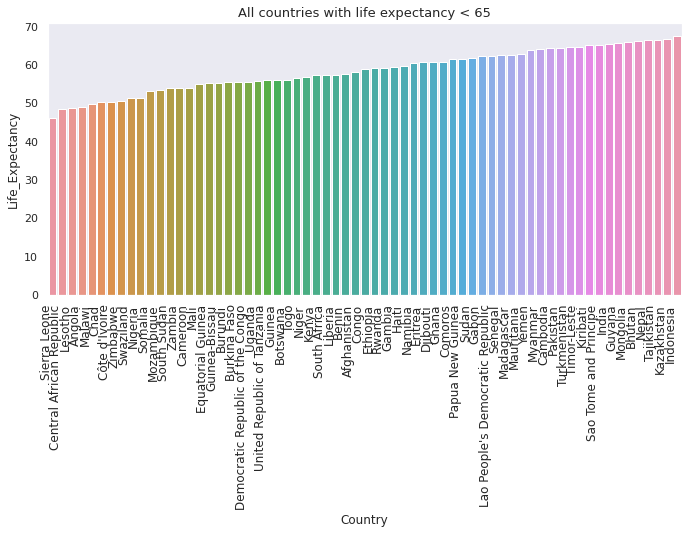

In [100]:
# Visualizing all countries with life expectancy less than 65 using lineplots.
plt.figure(figsize=(25,5))
sns.set(style='dark')

plt.subplot(1,2,1)
plot1 = sns.barplot(data=country,x=country.Country,y=country['Life_Expectancy'])
plot1.set_title("All countries with life expectancy < 65",fontsize=13)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha="right", fontsize=12)
plt.show()

In [101]:
#How much alcohol affects their life expectancy

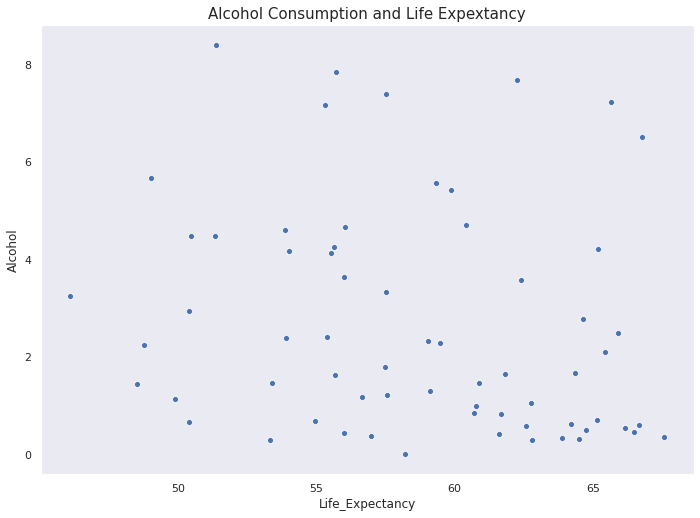

In [102]:
# Relationship between Alcohol and Life Expectancy
sb.scatterplot(country['Life_Expectancy'],country['Alcohol'])
plt.title('Alcohol Consumption and Life Expextancy', size = 15)
plt.gcf().set_size_inches(11.7, 8.27)

In [103]:
#relationship between total expenditure and life expacantcy

In [104]:
df_life_expectancy = pd.DataFrame(df.groupby(['Country'])[['Life_Expectancy', 'Tot_Exp']].mean()[1::]\
.sort_values(by = 'Life_Expectancy', ascending = False))

df_life_expectancy['Life_Expectancy_status'] = np.where(df_life_expectancy['Life_Expectancy']<65, 
                                                             'Lower(<65)', 'Higher(>65)')
df_life_expectancy.reset_index(level=0, inplace=True)
df_life_expectancy

,Country,Life_Expectancy,Tot_Exp,Life_Expectancy_status
0,Japan,82.53750,6.439262,Higher(>65)
1,Sweden,82.51875,9.683012,Higher(>65)
2,Iceland,82.44375,8.383012,Higher(>65)
3,Switzerland,82.33125,6.078012,Higher(>65)
4,France,82.21875,6.517387,Higher(>65)
...,...,...,...,...
187,Malawi,49.89375,6.613637,Lower(<65)
188,Angola,49.01875,4.045512,Lower(<65)
189,Lesotho,48.78125,7.503012,Lower(<65)
190,Central African Republic,48.51250,4.158012,Lower(<65)


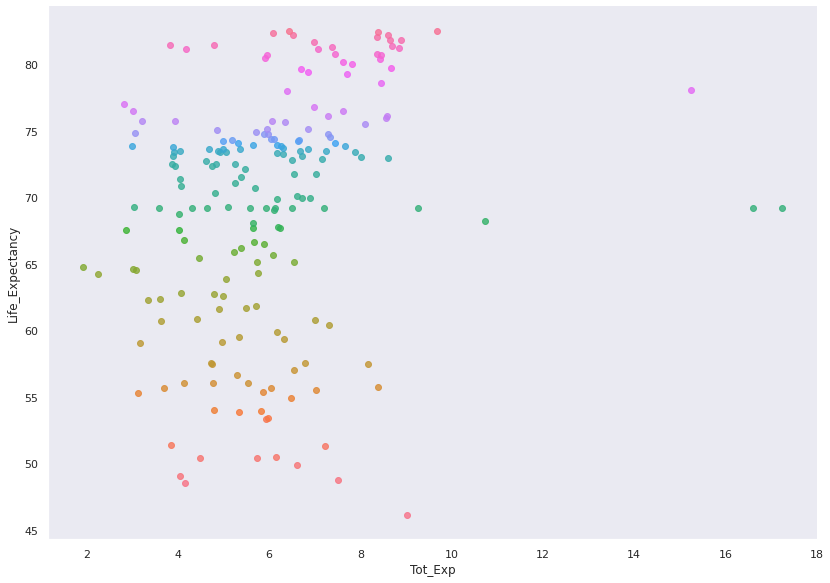

In [105]:
sb.lmplot( x="Tot_Exp", y="Life_Expectancy", data=df_life_expectancy, fit_reg=False, 
          hue='Life_Expectancy', height=8.27, aspect=11.7/8.27, legend=False)


